In [32]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [13]:
df = pd.read_csv("E:\\ML\\AISS\\glass_1_0710\\glass.csv")

In [14]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'


In [15]:
df.shape

(214, 10)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null object
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [17]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [18]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


In [19]:
df.Type.unique() 

array(["'build wind float'", "'vehic wind float'", 'tableware',
       "'build wind non-float'", 'headlamps', 'containers'], dtype=object)

In [20]:
df.Type.value_counts()

'build wind non-float'    76
'build wind float'        70
headlamps                 29
'vehic wind float'        17
containers                13
tableware                  9
Name: Type, dtype: int64

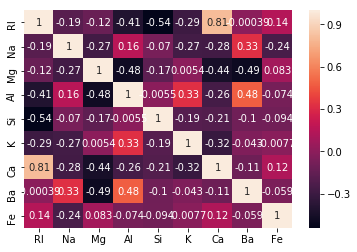

In [24]:
sn.heatmap(df.corr(), annot=True)
plt.show()

In [25]:
label_encoder = preprocessing.LabelEncoder()
df['Type'] = label_encoder.fit_transform(df['Type'])
df['Type'].unique()

array([0, 2, 5, 1, 4, 3], dtype=int64)

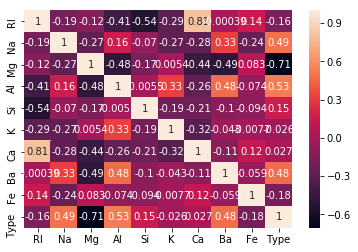

In [26]:
sn.heatmap(df.corr(), annot=True)
plt.show()

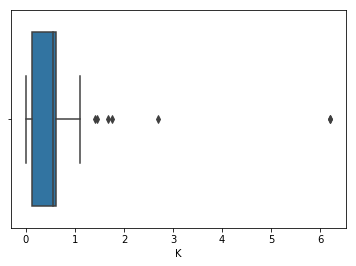

In [11]:
sns.boxplot(x="K", data=df)

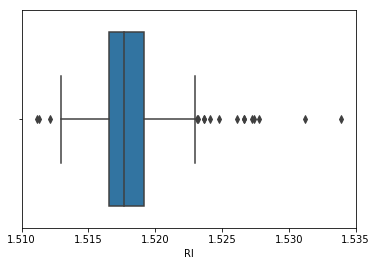

In [14]:
sns.boxplot(x="RI", data=df)

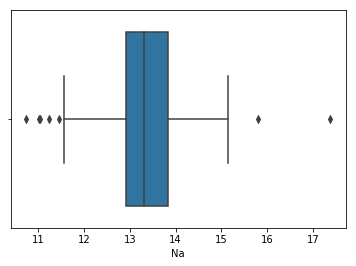

In [16]:
sns.boxplot(x="Na", data=df)

In [33]:
X = df.values[:,0:9]
Y = df.values[:,9]

scalar = StandardScaler()
df[["RI", "K", "Na", "Al", "Si", "Ca", "Ba", "Fe"]] = scalar.fit_transform(df[["RI", "K", "Na", "Al", "Si", "Ca", "Ba", "Fe"]])

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)

classifier = RandomForestClassifier(n_estimators = 50)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

print("\n\nConfusion Matrix: \n\n", confusion_matrix(y_test, y_pred))
print ("\n\nAccuracy : \n\n", accuracy_score(y_test,y_pred)*100)
print("\n\nReport : \n\n", classification_report(y_test, y_pred))



Confusion Matrix: 

 [[22  1  0  0  0  0]
 [ 5 14  1  2  0  0]
 [ 0  0  2  0  0  0]
 [ 0  2  0  1  1  0]
 [ 1  2  0  0  8  0]
 [ 0  0  0  0  0  3]]


Accuracy : 

 76.92307692307693


Report : 

               precision    recall  f1-score   support

         0.0       0.79      0.96      0.86        23
         1.0       0.74      0.64      0.68        22
         2.0       0.67      1.00      0.80         2
         3.0       0.33      0.25      0.29         4
         4.0       0.89      0.73      0.80        11
         5.0       1.00      1.00      1.00         3

    accuracy                           0.77        65
   macro avg       0.74      0.76      0.74        65
weighted avg       0.77      0.77      0.76        65

